In [44]:
#Llamar al dataloader
%run DataLoader.ipynb

# Análisis de tweets repetidos

In [45]:
#Hacemos un fillna porque a la hora de hacer group by, buscar duplicados o hacer un pivot
#los NaN generan un mal resultado

dataset = dataset.fillna(value='NaN')

In [46]:
#Encontramos los tweets repetidos
grupo = dataset.groupby(['keyword', 'location', 'text', 'longitud', 'target']).agg({'text':'count'})
grupo.columns = ['repeticiones']
grupo = grupo.reset_index()

# Hacemos un pivot de la tabla para ver los resultados repetidos de mejor manera
grupo = grupo.pivot_table(index = ['keyword', 'location', 'text', 'longitud'],\
     columns = 'target', values = 'repeticiones', fill_value = 0, aggfunc = 'sum')
grupo.columns = ['Falso', 'Verdadero']
grupo = grupo.reset_index()
grupo['Total'] = grupo.Falso + grupo.Verdadero
grupo = grupo[grupo.Total > 1]
grupo

,keyword,location,text,longitud,Falso,Verdadero,Total
75,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,114,2,0,2
157,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/TH...,138,2,0,2
159,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...,138,2,0,2
179,airplane%20accident,NaN,Experts in France begin examining airplane deb...,136,0,2,2
653,bioterrorism,NaN,To fight bioterrorism sir.,26,2,2,4
2373,demolition,NaN,General News Û¢åÊ'Demolition of houses on wat...,137,2,0,2
2470,derailment,India,Madhya Pradesh Train Derailment: Village Youth...,63,0,2,2
2488,derailment,NaN,Madhya Pradesh Train Derailment: Village Youth...,63,0,2,2
2489,derailment,NaN,Madhya Pradesh Train Derailment: Village Youth...,136,0,3,3
2674,detonate,"Morioh, Japan",@TinyJecht Are you another Stand-user? If you ...,99,3,0,3


In [22]:
#Repeticiones totales
grupo.Total.sum()

97

In [17]:
#Cantidad de veces que se reptite cada texto
grupo.text.value_counts().to_frame()

,text
Madhya Pradesh Train Derailment: Village Youth Saved Many Lives,2
Madhya Pradesh Train Derailment: Village Youth Saved Many Lives: A group of villagers saved over 70 passengers' lives after two train...,1
that horrible sinking feeling when youÛªve been at home on your phone for a while and you realise its been on 3G this whole time,1
Caution: breathing may be hazardous to your health.,1
RT NotExplained: The only known image of infamous hijacker D.B. Cooper. http://t.co/JlzK2HdeTG,1
http://t.co/c1H7JECFrV @RoyalCarribean do your passengers know about the mass murder that takes place in the #FaroeIslands every year?,1
#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_,1
Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw,1
To fight bioterrorism sir.,1
11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...,1


In [18]:
#Cantidad de textos distintos
grupo.text.value_counts().count()

35

In [19]:
grupo.keyword.value_counts().to_frame()

,keyword
hellfire,4
derailment,3
displaced,3
detonate,2
aftershock,2
injury,2
terrorist,1
floods,1
refugees,1
suicide%20bomb,1


In [20]:
grupo.keyword.value_counts().count()

26

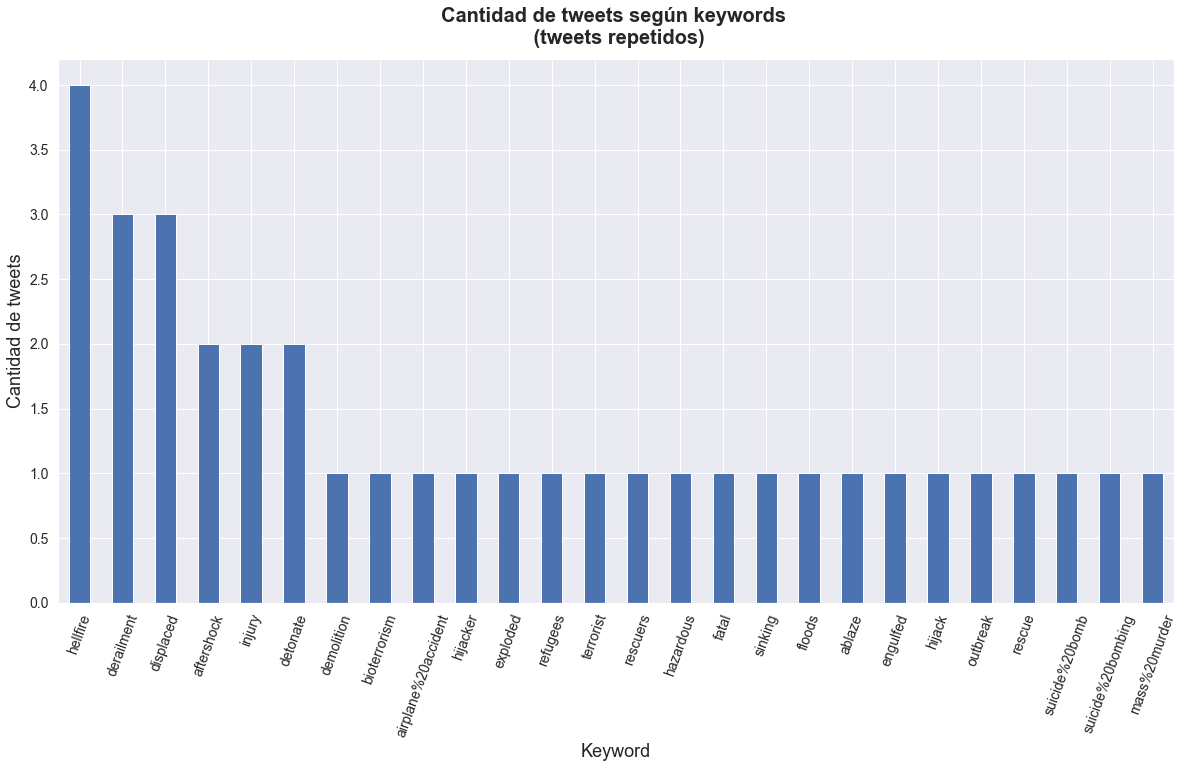

In [48]:
fig, ax = plt.subplots()
grupo.keyword.value_counts().to_frame().plot.bar(ax = ax, stacked = True, legend=False)
plt.ylabel('Cantidad de tweets')
plt.xlabel("Keyword")
plt.xticks(rotation=70)
plt.title('Cantidad de tweets según keywords \n (tweets repetidos)', pad = 15)
plt.show()
# fig.savefig('figure.png')

## Análisis de tweets repetidos por location y target

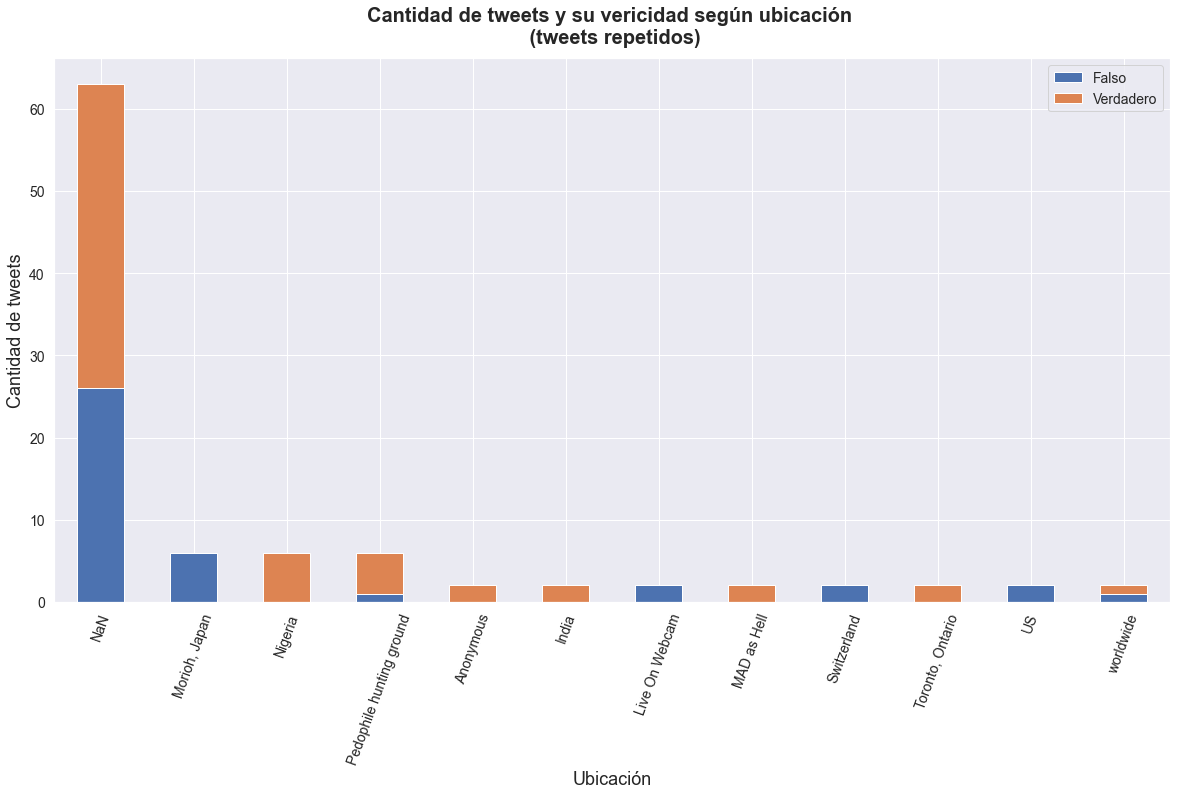

In [50]:
grupoLocationTarget = grupo.groupby('location').agg({'Falso': 'sum', 'Verdadero':'sum', 'Total' : 'sum'})
grupoLocationTarget.columns = ['Falso', 'Verdadero', 'Total']
grupoLocationTarget = grupoLocationTarget.sort_values(by = 'Total', ascending=False)
grupoLocationTarget = grupoLocationTarget.drop(columns = ['Total'])


fig, ax = plt.subplots()
grupo1.plot.bar(ax = ax, stacked = True)
plt.ylabel('Cantidad de tweets')
plt.xlabel("Ubicación")
plt.xticks(rotation=70)
plt.title('Cantidad de tweets y su vericidad según ubicación \n (tweets repetidos)', pad = 15)
plt.show()